In [1]:
import os
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib ipympl
#%matplotlib inline

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

#%matplotlib inline

In [10]:
########################
# Theory for chi according to L. Bovo JPCM 2013

# constants
NA = 6.022e23
kb = 1.3807e-23 # in J/K
m  = 2.526 # in ub/Nd ion
u0 = 4e-7*np.pi # muon_0 in T m A^-1
ub = 9.274e-24 # A m^2

# C
C =  NA * u0 * (m*ub)**2 / (3*kb) # unit depends on the the number of mag ions, if per m^3, in K, if per mol, in m3/mol*K

def chiT(T, Tc, MuEff, x0):
    #C = NA * u0 * (MuEff*ub)**2 / (3*kb) 
    C = NA * u0 * (MuEff * ub)**2 / (3*kb) / (4e-6*np.pi)
    return 1/(C/(T-Tc) + x0)

def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

fig_label = ('Data', r'Fit')
print(fig_label)

def pltFitReg(dat,x1=10,x2=30,p0=[-5,1.0,0]):
    popt, pcov = optimize.curve_fit(chiT, fitReg(dat,x1,x2)[:,0], fitReg(dat,x1,x2)[:,1],p0)
    print(popt)    
    
    global fig, ax
    ax.cla()
    
    ax.plot(dat[:,0], dat[:,1], 'o', mfc='white',label=fig_label[0])

    t = np.linspace(x1,x2, 100)
    ax.plot(t, chiT(t, popt[0], popt[1], popt[2]), 'r', lw=0.5, alpha=1, label=fig_label[1])
       
    ax.set_ylabel(r'$\chi$ (emu/mol)',size=14,labelpad=-1)  
    ax.set_xlabel(r'T (K)',size=14,labelpad=-1)
    
    ax.tick_params(axis='both',which='both',labelsize=14,width=1,length=3)
    ax.legend(loc='best',numpoints=1,fontsize=13, frameon=False)

    return #fig

('Data', 'Fit')


# Fit 1/chi data of CdTm2S4 
data from G. C. Lau et al, PRB 72, 054411 (2005);

If fit range 10-300K, the result is consistent with the paper.


## Fit differnent ranges

In [14]:
fpath = r'D:\4_Physical_Properties\CdTm2S4/chi_T_CdTm2S4.txt' # 1/chi-T
fpath = r'D:\4_Physical_Properties\CdTm2S4/chi_T_CdTm2S4_inset.txt' #chi-T
fpath = r'D:\4_Physical_Properties\CdTm2S4/chi_T_CdTm2Se4.txt' # 1/chi-T
dat = np.genfromtxt(fpath,delimiter=',')
#dat[:,1]= 1/dat[:,1]

interactive(children=(FloatSlider(value=10.0, description='x1', max=40.0, min=5.0, step=1.0), FloatSlider(valu…

<function __main__.pltFitReg(dat, x1=10, x2=30, p0=[-5, 1.0, 0])>

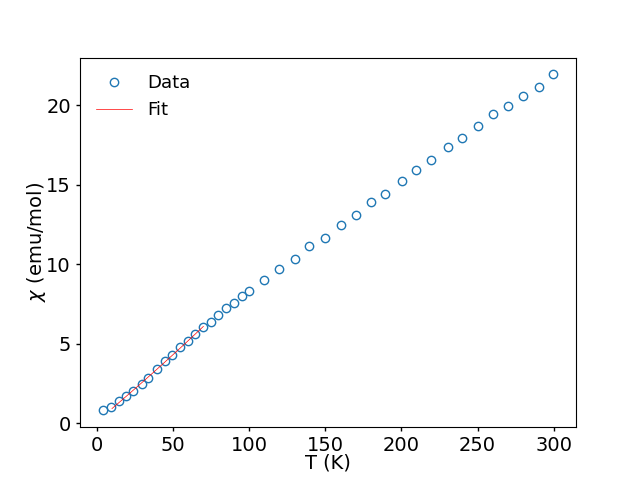

In [17]:
fig, ax = plt.subplots()
interact(pltFitReg, 
         dat=fixed(dat),
         x1=widgets.FloatSlider(min=5,max=40,step=1,value=10),
         x2=widgets.FloatSlider(min=5,max=100,step=1,value=70),__manual=True,
         p0=fixed([1,5,0]))

## Plot $\mu_\text{eff} = \sqrt{8\chi T}$ 
($chi$ in emu/mol)

Equation from [Ce2Sn2O7, prl](10.1103/PhysRevLett.115.097202)

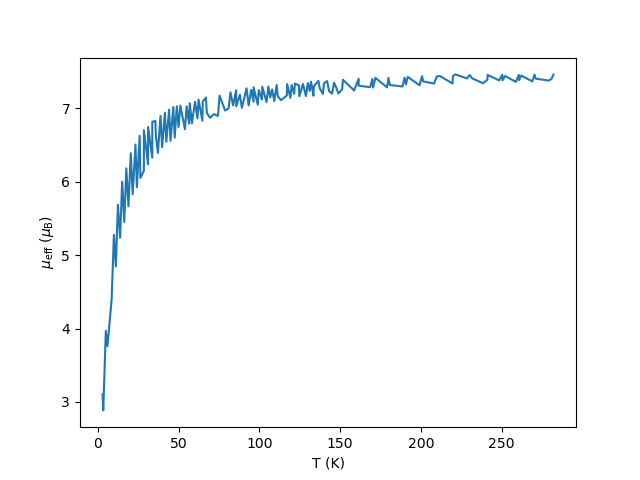

In [8]:
fig0, ax0 = plt.subplots()
ax0.plot(dat[:,0], np.sqrt(8/dat[:,1]*dat[:,0]))
ax0.set_xlabel('T (K)')
ax0.set_ylabel('$\mu_\mathrm{eff}$ ($\mu_\mathrm{B}$)')
plt.show()

# Ho2GaSbO7

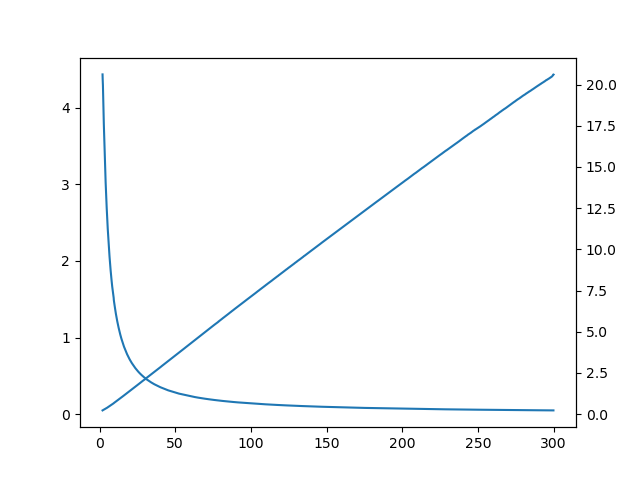

In [3]:
fpath = r'D:\4_Physical_Properties\Ho2GaSbO7\MT_MH\ZFC.txt' # Powder HoGaSbO7 above 2K in 500Oe fields
dat0 = np.genfromtxt(fpath, skip_header=1)
dat0 = np.vstack([dat0[:,0],dat0[:,2]/0.011*633.34/2/500]).T #T=chi, emu/mol
dat = np.vstack([dat0[:,0],1/dat0[:,1]]).T #T-chi^-1, emu/mol

plt.figure()
plt.plot(dat0[:,0],dat0[:,1])
ax2 = plt.gca().twinx()
ax2.plot(dat[:,0],dat[:,1])
plt.show()

## Fit Curie-Weiss

interactive(children=(FloatSlider(value=10.0, description='x1', max=50.0, min=5.0, step=1.0), FloatSlider(valu…

<function __main__.pltFitReg(dat, x1=10, x2=30, p0=[-5, 1.0, 0])>

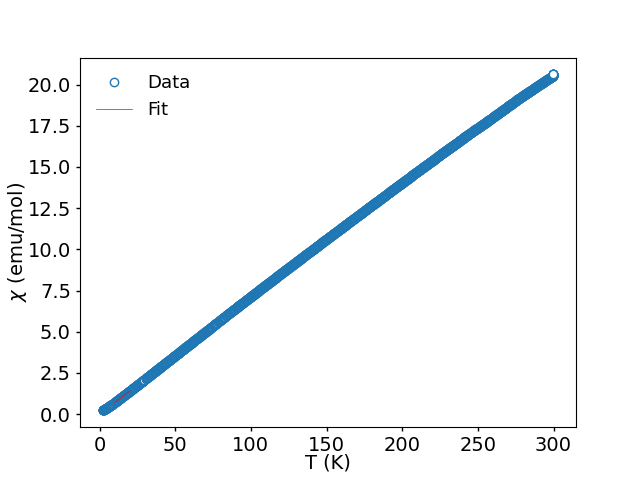

In [11]:
fig, ax = plt.subplots()
interact(pltFitReg, 
         dat=fixed(dat),
         x1=widgets.FloatSlider(min=5,max=50,step=1,value=10),
         x2=widgets.FloatSlider(min=5,max=50,step=1,value=20),
         p0=fixed([1,10,0])) 

## Plot $\mu_\text{eff} = \sqrt{8\chi T}$ 
($chi$ in emu/mol)

IndexError: index 2 is out of bounds for axis 1 with size 2

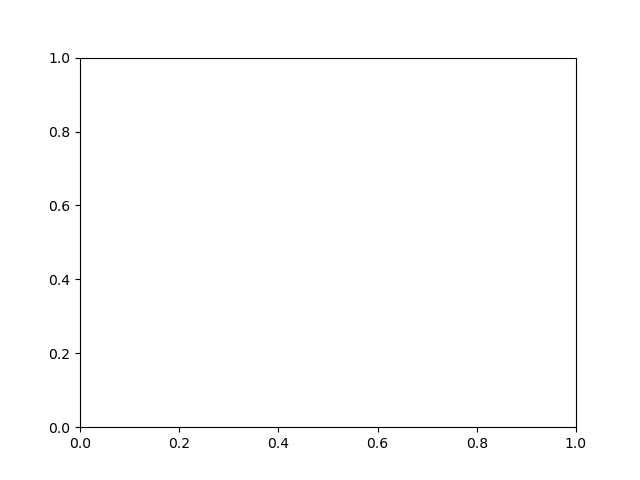

In [5]:
fig0, ax0 = plt.subplots()
ax0.plot(dat0[:,0], np.sqrt(8*(dat0[:,2]/500/0.011*633.34/2)*dat[:,0]))
ax0.set_xlabel('T (K)')
ax0.set_ylabel('$\mu_\mathrm{eff}$ ($\mu_\mathrm{B}$)')
plt.show()
"""Ueff decrease at low T meaning a negative Tcw
How about the boulet splitting effect (singlet is none magnetic)
"""

## xt/c
see: nzo_chiTdivC_orderM.ipynb

In [6]:
# constants
NA = 6.022e23
kb = 1.3807e-23 # in J/K
m  = 10 # in ub/Ho ion
u0 = 4e-7*np.pi # muon_0 in T m A^-1
ub = 9.274e-24 # A m^2

# C
C =  NA * u0 * (m*ub)**2 / (3*kb) # unit depends on the the number of mag ions, if per m^3, in K, if per mol, in m3/mol*K
C1 = C  / (4e-6*np.pi) # convert C to emu/mol*K

def chiTC(T,J):
    return 2*(1+np.exp(2*J/T)) / (2+np.exp(2*J/T)+np.exp(-6*J/T))

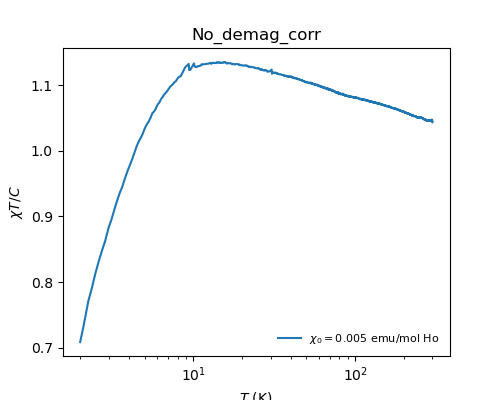

In [7]:
plt.figure(figsize=[5,4])
chi0= 0.005
plt.semilogx(dat0[:,0],(dat0[:,1]-chi0)*dat0[:,0]/C1,label='$\chi_0=$'+'{}'.format(chi0)+' emu/mol Ho')

ax = plt.gca()
plt.title('No_demag_corr')
plt.text(1,0.5,'Dashed: theory\nSolid:     data', transform=ax.transData)
plt.xlabel(r'$\mathit{T}$ (K)'); plt.ylabel(r'$\chi T / C$')

plt.legend(loc='best',frameon=False,fontsize=8)#[0.45,0.58]
plt.show()

In [83]:
plt.close('all')